In [1]:
from Board import *
from RandomPlayer import *
from MinMaxPlayer import *
from TabularQPlayer import *
from DQNPlayer import *
from Game import play_game, battle
import matplotlib.pyplot as plt
from IPython.display import HTML, display

In [2]:
def print_board(board):
    display(HTML("""
    <style>
    .rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
      border: 1px  black solid !important;
      color: black !important;
    }
    </style>
    """+board.html_str()))

In [3]:
board = Board()
board.reset()
finished = False
while not finished:
    _, result, finished = board.move(board.random_empty_spot(), CROSS)
    print_board(board)
    if finished:
        if result == GameResult.DRAW:
            print("Game is a draw")
        else:
            print("Cross won!")
    else:
        _, result, finished = board.move(board.random_empty_spot(), NAUGHT)
        print_board(board)
        if finished:
            if result == GameResult.DRAW:
                print("Game is a draw")
            else:
                print("Naught won!")

,,
,,
,,x


o,,
,,
,,x


o,,
,,
x,,x


o,,
,o,
x,,x


o,x,
,o,
x,,x


o,x,
,o,
x,o,x


o,x,x
,o,
x,o,x


o,x,x
o,o,
x,o,x


o,x,x
o,o,x
x,o,x


Cross won!


# Random Player Stats

In [ ]:
player1 = RandomPlayer()
player2 = RandomPlayer()
result = play_game(board, player1, player2)
print_board(board)
if result == GameResult.CROSS_WIN:
    print("Cross won")
elif result == GameResult.NAUGHT_WIN:
    print("Naught won")
else:
    print("Draw")

In [ ]:
num_games = 100000

draw_count = 0
cross_count = 0
naught_count = 0

p1 = RandomPlayer()
p2 = RandomPlayer()

for _ in range(num_games):
    result = play_game(board, p1, p2)
    if result == GameResult.CROSS_WIN:
        cross_count += 1
    elif result == GameResult.NAUGHT_WIN:
        naught_count += 1
    else:
        draw_count += 1
        
print("After {} game we have draws: {}, cross wins: {}, and naught wins: {}.".format(num_games, draw_count, 
                                                                        cross_count, naught_count))

print("Which gives percentages of draws : cross : naught of about {:.2%} : {:.2%} : {:.2%}".format(
    draw_count / num_games, cross_count / num_games, naught_count / num_games))

# MinMaxPlayer

In [ ]:
battle(MinMaxAgent(), RandomPlayer())

In [ ]:
battle(RandomPlayer(),MinMaxAgent())

In [ ]:
battle(MinMaxAgent(), MinMaxAgent())

# Tabular Q Learning

In [ ]:
def eval_players(p1 : Player, p2 : Player, num_battles : int, games_per_battle = 100, loc='best'):
    p1_wins = []
    p2_wins = []
    draws = []
    count = []    

    for i in range(num_battles):
        p1win, p2win, draw = battle(p1, p2, games_per_battle, True)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append(i*games_per_battle)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append((i+1)*games_per_battle)

    plt.ylabel('Game outcomes in %')
    plt.xlabel('Game number')

    plt.plot(count, draws, 'r-', label='Draw')
    plt.plot(count, p1_wins, 'g-', label='Player 1 wins')
    plt.plot(count, p2_wins, 'b-', label='Player 2 wins')
    plt.legend(loc=loc, shadow=True, fancybox=True, framealpha =0.7)

In [ ]:
player1 = MinMaxAgent()
player2 = TQPlayer()
eval_players(player1, player2, 5)

In [ ]:
player1 = TQPlayer()
player2 = TQPlayer()
eval_players(player1, player2, 100)

In [ ]:
player1 = RandomPlayer()
player2 = TQPlayer()
eval_players(player1, player2, 100)

In [ ]:
player1 = TQPlayer()
player2 = RandomPlayer()
eval_players(player1, player2, 100)

# DQN

In [5]:
# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [6]:
def evaluate_players(p1 : Player, p2 : Player, games_per_battle = 100, num_battles = 100):
    board = Board()

    p1_wins = []
    p2_wins = []
    draws = []
    game_number = []
    game_counter = 0

    for i in range (num_battles):
        p1win, p2win, draw = battle(p1, p2, games_per_battle,True)
        p1_wins.append(p1win)
        p2_wins.append(p2win)
        draws.append(draw)
        game_counter=game_counter+1
        game_number.append(game_counter)

    return game_number, p1_wins, p2_wins, draws

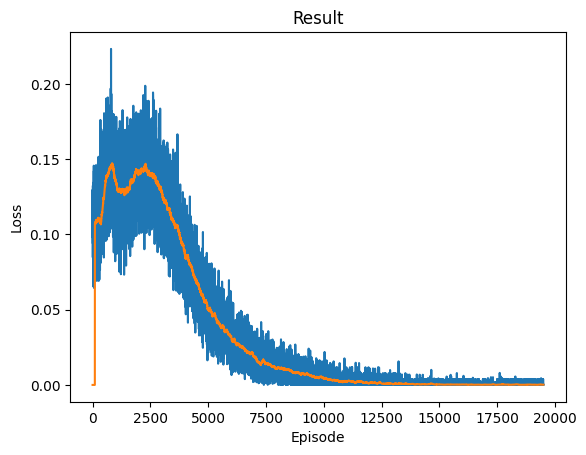

<Figure size 640x480 with 0 Axes>

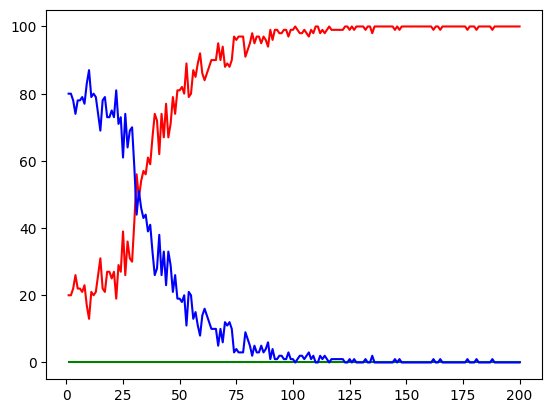

In [22]:
player1 = DQNPlayer(LR = 1e-2, TAU = 0.001, EPS_DECAY = 10000, GAMMA=0.95, EPS_START = 0.95, EPS_END = 0.0)
player2 = MinMaxAgent() #DQNPlayer()
game_number, p1_wins, p2_wins, draws = evaluate_players(player1, player2, 100, 200)
player1.plot_losses(True)
p = plt.plot(game_number, draws, 'r-', game_number, p1_wins, 'g-', game_number, p2_wins, 'b-')

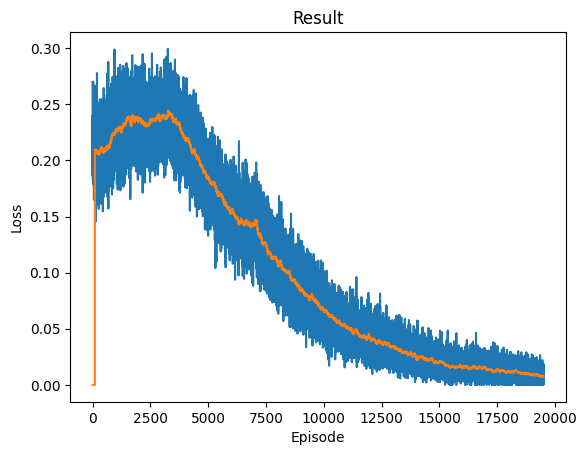

<Figure size 640x480 with 0 Axes>

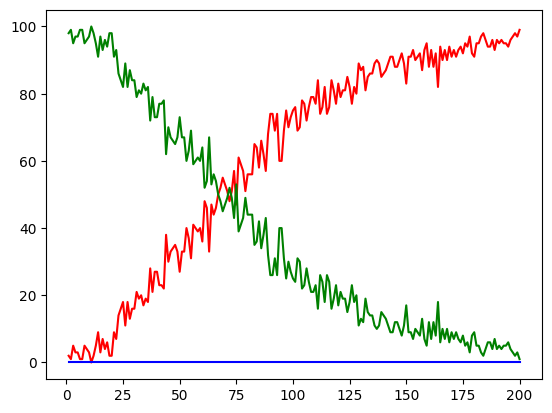

In [45]:
player1 =  MinMaxAgent()
player2 =  DQNPlayer(LR = 1e-2, TAU = 0.001, EPS_DECAY = 15000, GAMMA=0.95, EPS_START = 0.95, EPS_END = 0.01) #DQNPlayer()
game_number, p1_wins, p2_wins, draws = evaluate_players(player1, player2, 100, 200)
player2.plot_losses(True)
p = plt.plot(game_number, draws, 'r-', game_number, p1_wins, 'g-', game_number, p2_wins, 'b-')

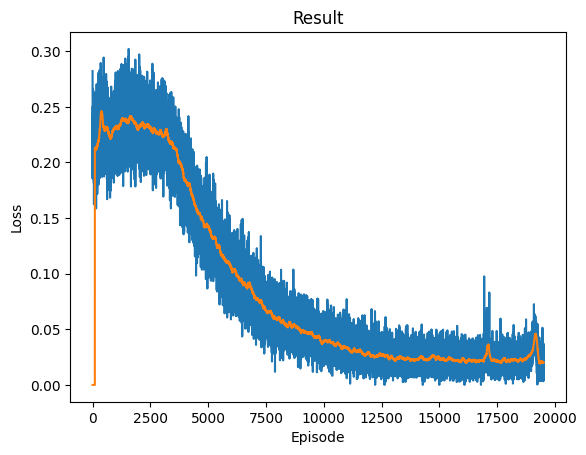

<Figure size 640x480 with 0 Axes>

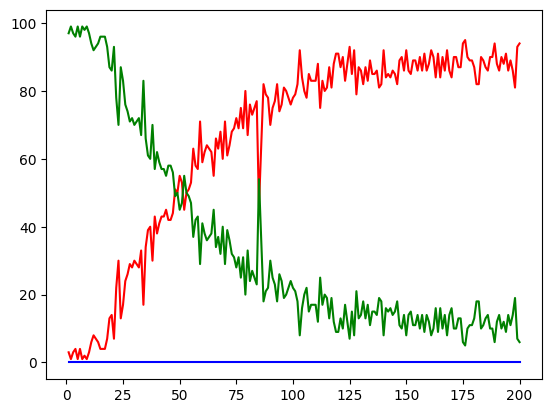

In [42]:
player1 =  MinMaxAgent()
player2 =  DQNPlayer(LR = 1e-2, TAU = 0.001, EPS_DECAY = 10000, GAMMA=0.95, EPS_START = 0.95, EPS_END = 0.05) #DQNPlayer()
game_number, p1_wins, p2_wins, draws = evaluate_players(player1, player2, 100, 200)
player2.plot_losses(True)
p = plt.plot(game_number, draws, 'r-', game_number, p1_wins, 'g-', game_number, p2_wins, 'b-')

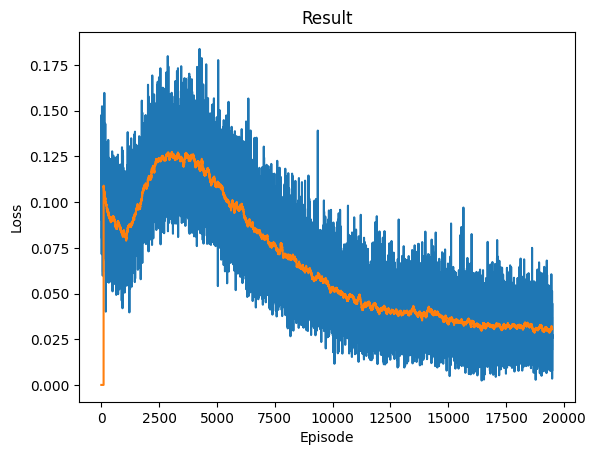

<Figure size 640x480 with 0 Axes>

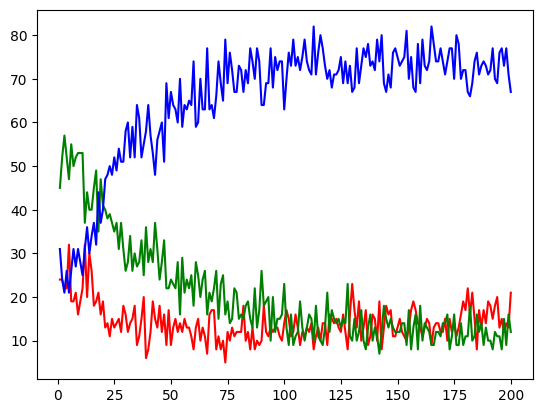

In [13]:
player1 =  RandomPlayer()
player2 =  DQNPlayer(LR = 1e-3, TAU = 0.001, EPS_DECAY = 10000, GAMMA=0.95, EPS_START = 0.95, EPS_END = 0.01)
game_number, p1_wins, p2_wins, draws = evaluate_players(player1, player2, 100, 200)
player2.plot_losses(True)
p = plt.plot(game_number, draws, 'r-', game_number, p1_wins, 'g-', game_number, p2_wins, 'b-')

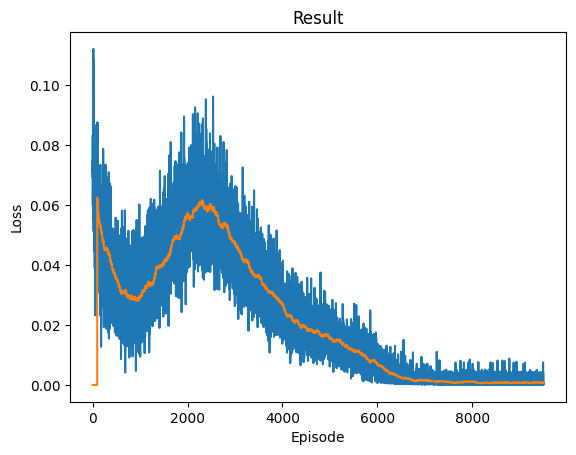

<Figure size 640x480 with 0 Axes>

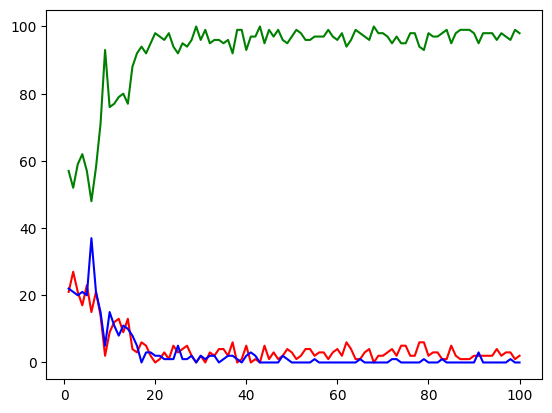

In [14]:
player1 =  DQNPlayer() 
player2 =  RandomPlayer()
game_number, p1_wins, p2_wins, draws = evaluate_players(player1, player2, 100)
player1.plot_losses(True)
p = plt.plot(game_number, draws, 'r-', game_number, p1_wins, 'g-', game_number, p2_wins, 'b-')

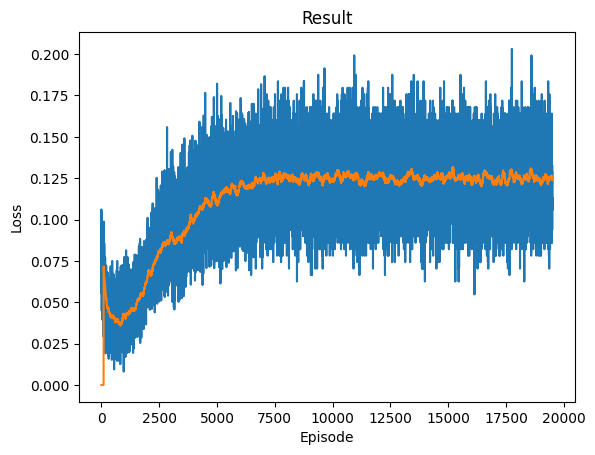

<Figure size 640x480 with 0 Axes>

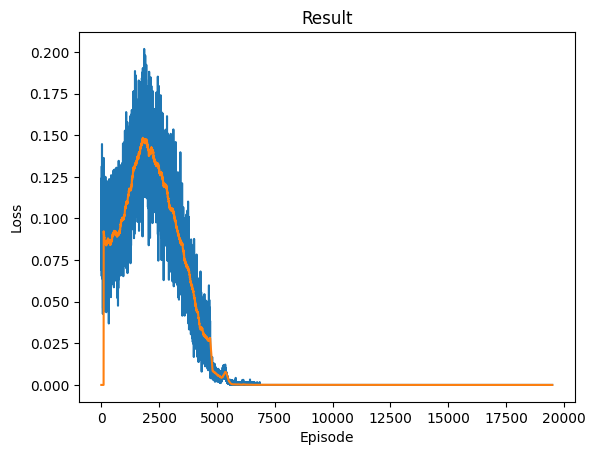

<Figure size 640x480 with 0 Axes>

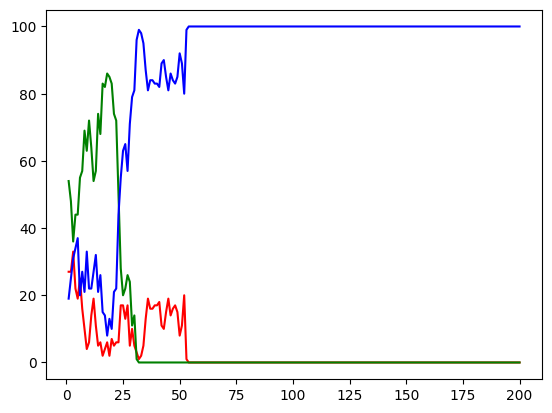

In [46]:
player1 =  DQNPlayer()
player2 =  DQNPlayer() 
game_number, p1_wins, p2_wins, draws = evaluate_players(player1, player2, 100, 200)
player1.plot_losses(True)
player2.plot_losses(True)
p = plt.plot(game_number, draws, 'r-', game_number, p1_wins, 'g-', game_number, p2_wins, 'b-')